In [83]:
#https://www.kaggle.com/datasets/iashiqul/brain-tumor-mri-image-classification-dataset
# dataset link

import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from keras.applications import VGG16 , ResNet50
from keras.layers import Dense , Flatten , AveragePooling2D

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-image-classification-dataset/MRI Image Dataset for Brain Tumor/MRI Image Dataset for Brain Tumor/Validation/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-image-classification-dataset/MRI Image Dataset for Brain Tumor/MRI Image Dataset for Brain Tumor/Validation/pituitary/Tr-pi_0758.jpg
/kaggle/input/brain-tumor-mri-image-classification-dataset/MRI Image Dataset for Brain Tumor/MRI Image Dataset for Brain Tumor/Validation/pituitary/Tr-pi_0946.jpg
/kaggle/input/brain-tumor-mri-image-classification-dataset/MRI Image Dataset for Brain Tumor/MRI Image Dataset for Brain Tumor/Validation/pituitary/Tr-pi_1057.jpg
/kaggle/input/brain-tumor-mri-image-classification-dataset/MRI Image Dataset for Brain Tumor/MRI Image Dataset for Brain Tumor/Validation/pituitary/Tr-pi_0980.jpg
/kaggle/input/brain-tumor-mri-image-classification-dataset/MRI Image Dataset for Brain Tumor/MRI Image Dataset for Brain Tumor/Validation/pituitary/Tr-pi_0759.jpg
/kaggle/input/brain-tu

In [3]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-image-classification-dataset/Brain Tumor MRI Classfication/Brain Tumor MRI Classfication/Training/glioma_tumor/gg (1).jpg')


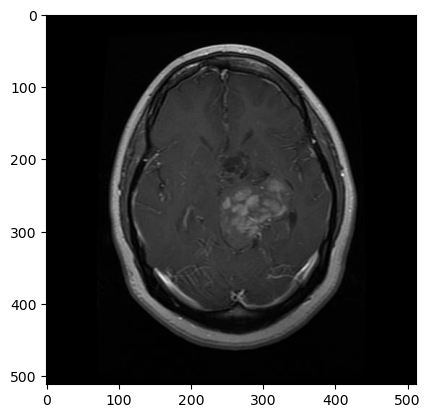

In [4]:
plt.imshow(img)

In [5]:
img.shape

(512, 512, 3)

In [6]:
len(os.listdir())

2

In [7]:
images = []
label = []

**READING THE IMAGES AND LABELS**

In [8]:
os.chdir('/kaggle/input/brain-tumor-mri-image-classification-dataset/Brain Tumor MRI Classfication/Brain Tumor MRI Classfication/Training/glioma_tumor')
for i in (os.listdir()):
    img = cv2.imread(i)
    img = cv2.resize(img,(224,224))
    images.append(img)
    label.append('glioma_tumor')

In [9]:
len(images)

826

In [10]:
os.chdir('/kaggle/input/brain-tumor-mri-image-classification-dataset/Brain Tumor MRI Classfication/Brain Tumor MRI Classfication/Training/meningioma_tumor')
for i in (os.listdir()):
    img = cv2.imread(i)
    img = cv2.resize(img,(224,224))
    images.append(img)
    label.append('meningioma_tumor')

In [11]:
len(images)

1648

In [12]:
os.chdir('/kaggle/input/brain-tumor-mri-image-classification-dataset/Brain Tumor MRI Classfication/Brain Tumor MRI Classfication/Training/no_tumor')
for i in (os.listdir()):
    img = cv2.imread(i)
    img = cv2.resize(img,(224,224))
    images.append(img)
    label.append('no_tumor')

In [13]:
os.chdir('/kaggle/input/brain-tumor-mri-image-classification-dataset/Brain Tumor MRI Classfication/Brain Tumor MRI Classfication/Training/pituitary_tumor')
for i in (os.listdir()):
    img = cv2.imread(i)
    img = cv2.resize(img,(224,224))
    images.append(img)
    label.append('pituitary_tumor')

In [14]:
print(len(images))
print(len(label))

2870
2870


**LABEL ENCODING the LABELS**

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
label = le.fit_transform(label)

**TRAIN TEST SPLIT**

In [18]:
X_train , X_test ,Y_train , Y_test = train_test_split(images , label , test_size = 0.2 , random_state = 42)

In [19]:
len(X_train)

2296

In [20]:
Y_train

array([2, 2, 0, ..., 1, 1, 1])

**CONVERTING LABEL TO TO_CATEGORICAL TO TRAIN THE MODEL**

In [21]:
from keras.utils import to_categorical
train_labels = to_categorical(Y_train)

In [22]:
test_labels = to_categorical(Y_test)

In [23]:
train_labels

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

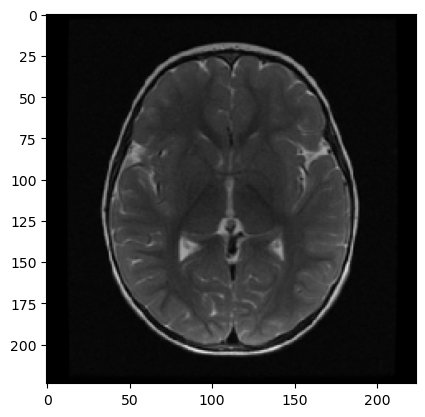

In [24]:
plt.imshow(X_train[0])

**CONVERTING DATA TO NUMPY ARRAY**

In [25]:
Y_train = np.array(train_labels)
X_train = np.array(X_train)
Y_test = np.array(test_labels)
X_test = np.array(X_test) 

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

**VGG TRANSFER LEARNING**

In [26]:
model = VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [27]:
for layer in model.layers:
    layer.trainable = False

In [28]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [29]:
from keras.models import Model

In [56]:
def build_model(output):
    x = Flatten()(output)
    x = Dense(1024,activation='relu')(x)
    x = Dense(512,activation='relu')(x)
    x = Dense(4,activation='sigmoid')(x)
    return x

In [78]:
output = model.output
new_output = build_model(output)
vgg = Model(inputs=model.input, outputs=new_output)

In [79]:
print(vgg.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [80]:
vgg.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [81]:
list(le.classes_)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [82]:
history = vgg.fit(X_train,Y_train,batch_size=64,validation_data=(X_test,Y_test),epochs=10,verbose=1)

Epoch 1/10
36/36 [==============================] - 14s 358ms/step - loss: 28.3181 - accuracy: 0.6555 - val_loss: 2.1281 - val_accuracy: 0.8118
Epoch 2/10
36/36 [==============================] - 12s 349ms/step - loss: 0.4390 - accuracy: 0.9190 - val_loss: 0.8158 - val_accuracy: 0.8833
Epoch 3/10
36/36 [==============================] - 13s 352ms/step - loss: 0.2173 - accuracy: 0.9525 - val_loss: 0.8153 - val_accuracy: 0.8659
Epoch 4/10
36/36 [==============================] - 13s 356ms/step - loss: 0.0886 - accuracy: 0.9760 - val_loss: 0.7451 - val_accuracy: 0.8990
Epoch 5/10
36/36 [==============================] - 13s 353ms/step - loss: 0.0222 - accuracy: 0.9943 - val_loss: 0.4486 - val_accuracy: 0.9321
Epoch 6/10
36/36 [==============================] - 13s 350ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.5783 - val_accuracy: 0.9303
Epoch 7/10
36/36 [==============================] - 13s 350ms/step - loss: 0.0312 - accuracy: 0.9909 - val_loss: 0.8003 - val_accuracy: 0.895

In [91]:
history.history

{'loss': [28.31810760498047,
  0.43902140855789185,
  0.21729320287704468,
  0.0886286124587059,
  0.022179406136274338,
  0.02707281894981861,
  0.031179683282971382,
  0.1846081018447876,
  0.39537572860717773,
  0.040585435926914215],
 'accuracy': [0.6554877758026123,
  0.9189895391464233,
  0.9525261521339417,
  0.9760453104972839,
  0.9943379759788513,
  0.9912891983985901,
  0.9908536672592163,
  0.9599303007125854,
  0.9520906209945679,
  0.9912891983985901],
 'val_loss': [2.1281373500823975,
  0.8157731890678406,
  0.8152548670768738,
  0.7451210618019104,
  0.44856634736061096,
  0.5782790184020996,
  0.8003489375114441,
  1.1158934831619263,
  0.9173773527145386,
  0.6473609805107117],
 'val_accuracy': [0.8118466734886169,
  0.8832752704620361,
  0.8658536672592163,
  0.8989546895027161,
  0.9320557713508606,
  0.9303135871887207,
  0.895470380783081,
  0.888501763343811,
  0.907665491104126,
  0.9250870943069458]}

**TRAINING AND VALIDATION ACCURACY**

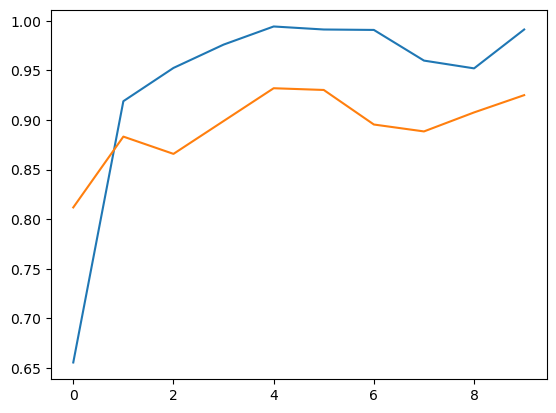

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [92]:
pred = vgg.predict(X_test)

18/18 [==============================] - 3s 140ms/step


In [75]:
np.argmax(pred[7])

2

In [93]:
img = cv2.imread('/kaggle/input/brain-tumor-mri-image-classification-dataset/Brain Tumor MRI Classfication/Brain Tumor MRI Classfication/Testing/glioma_tumor/image(1).jpg')

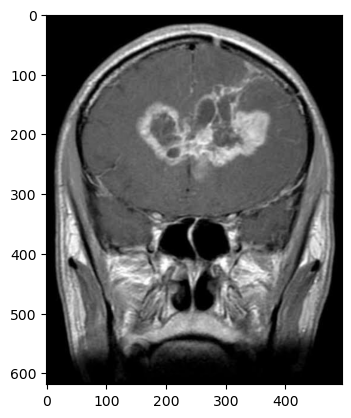

In [94]:
plt.imshow(img)

In [95]:
img = cv2.resize(img,(224,224))

In [99]:
img = np.array(img)
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

(224, 224, 3)

In [104]:
test_img = []

**CHECKING ON TEST DATA**

In [105]:
os.chdir('/kaggle/input/brain-tumor-mri-image-classification-dataset/Brain Tumor MRI Classfication/Brain Tumor MRI Classfication/Testing/no_tumor')
for i in (os.listdir()):
    img = cv2.imread(i)
    img = cv2.resize(img,(224,224))
    test_img.append(img)

In [107]:
test_img = np.array(test_img)

In [108]:
pred = vgg.predict(test_img)

4/4 [==============================] - 3s 935ms/step


In [112]:
print(np.argmax(pred[89]))

2


**APPLYING RESNET**

In [114]:
model2 = ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet')

94765736/94765736 [==============================] - 0s 0us/step


In [115]:
for layer in model2.layers:
    layer.trainable = False

In [122]:
output = model2.output
new_output = build_model(output)
resnet = Model(inputs=model2.input, outputs=new_output)

In [123]:
resnet.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [124]:
resnet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [125]:
history = resnet.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=64,epochs=10,verbose=1)

Epoch 1/10
36/36 [==============================] - 15s 309ms/step - loss: 30.0605 - accuracy: 0.6111 - val_loss: 2.0382 - val_accuracy: 0.8432
Epoch 2/10
36/36 [==============================] - 10s 276ms/step - loss: 0.8572 - accuracy: 0.8963 - val_loss: 0.7527 - val_accuracy: 0.8711
Epoch 3/10
36/36 [==============================] - 10s 293ms/step - loss: 0.1225 - accuracy: 0.9739 - val_loss: 0.3501 - val_accuracy: 0.9233
Epoch 4/10
36/36 [==============================] - 10s 288ms/step - loss: 0.0453 - accuracy: 0.9817 - val_loss: 0.3006 - val_accuracy: 0.9355
Epoch 5/10
36/36 [==============================] - 10s 286ms/step - loss: 0.0325 - accuracy: 0.9882 - val_loss: 0.4994 - val_accuracy: 0.9164
Epoch 6/10
36/36 [==============================] - 10s 284ms/step - loss: 0.0097 - accuracy: 0.9952 - val_loss: 0.3635 - val_accuracy: 0.9286
Epoch 7/10
36/36 [==============================] - 10s 285ms/step - loss: 0.0030 - accuracy: 0.9987 - val_loss: 0.3733 - val_accuracy: 0.937

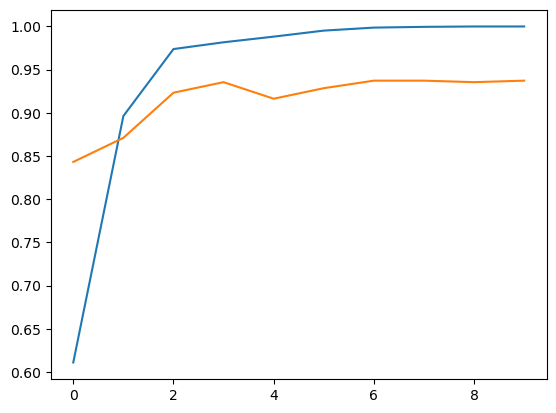

In [126]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [127]:
pred = resnet.predict(X_test)

18/18 [==============================] - 4s 142ms/step


In [129]:
Y_test[5]

array([0., 1., 0., 0.], dtype=float32)

In [130]:
np.argmax(pred[5])

1

In [132]:
test_img=[]

In [133]:
os.chdir('/kaggle/input/brain-tumor-mri-image-classification-dataset/Brain Tumor MRI Classfication/Brain Tumor MRI Classfication/Testing/pituitary_tumor')
for i in (os.listdir()):
    img = cv2.imread(i)
    img = cv2.resize(img,(224,224))
    test_img.append(img)

In [134]:
test_img = np.array(test_img)

In [136]:
pred = resnet.predict(test_img)

3/3 [==============================] - 1s 362ms/step


In [139]:
np.argmax(pred[2])

3